# Problem Statement

**DATA INFORMATION**

This dataset contains the motion data of 14 healthy older aged between 66 and 86 years old, performed broadly scripted activities using a batteryless, wearable sensor on top of their clothing at sternum level. Data is sparse and noisy due to the use of a passive sensor. 
Participants were allocated in two clinical room settings (S1 and S2). The setting of S1 (Room1) uses 4 RFID reader antennas around the room (one on ceiling level, and 3 on wall level) for the collection of data, whereas the room setting S2 (Room2) uses 3 RFID reader antennas (two at ceiling level and one at wall level) for the collection of motion data. 
The activities performed were: 
 walking to the chair, 
 sitting on the chair, 
 getting off the chair, 
 walking to bed, 
 lying on bed, 
 getting off the bed and 
 walking to the door. 

**COLUMNS INFO**
The content of the file is as follows:
Comma separated values (CSV) format
.
Column 1: Time in second
s 
Column 2: Acceleration reading in G for frontal a
xis
Column 3: Acceleration reading in G for vertical 
axis
Column 4: Acceleration reading in G for lateral
 axis
Column 5: Id of antenna reading 
sensor
Column 6: Received signal strength indicator 
(RSSI) 
Column 
7: Phase
Column 8: 
Frequency
Column 9: Label of activity, 1: sit on bed, 2: sit on chair, 3: lying, 4: 
ambulating
In addition, gender of participant is included in the last character of file name eg: d1p33F (F:female).

:female).



In [14]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import glob

## Loading Data in Python

In [38]:
def data_from_path(path):

    file_list = glob.glob(path+r'\*')
    dfs = []
    for i in file_list:
        df = pd.read_csv(i,header=None)
        dfs.append(df)
    combined_data = pd.concat(dfs,ignore_index=True)
    combined_data.columns = ['Time','Acc_f','Acc_v','Acc_l','Antena_ID','rssi','phase','freq','label']
    return combined_data
    

In [56]:
data_s1_f = data_from_path(r'D:\Day 5 Case Study\data\S1_Dataset\Female')
data_s1_f['gender'] = 0
data_s1_f['RFID'] = 4

In [58]:
data_s1_m = data_from_path(r'D:\Day 5 Case Study\data\S1_Dataset\Male')
data_s1_m['gender'] = 1
data_s1_m['RFID'] = 4

In [64]:
data_s2_f = data_from_path(r'D:\Day 5 Case Study\data\S2_Dataset\Female')
data_s2_f['gender'] = 0
data_s2_f['RFID'] = 3

In [70]:
data_s2_m = data_from_path(r'D:\Day 5 Case Study\data\S2_Dataset\Male')
data_s2_m['gender'] = 1
data_s2_m['RFID'] = 3

In [72]:
# Combine all these datasest

final_df = pd.concat([data_s1_f,data_s2_f,data_s1_m,data_s2_m],ignore_index=True)

In [76]:
final_df.head(7)

,Time,Acc_f,Acc_v,Acc_l,Antena_ID,rssi,phase,freq,label,gender,RFID
0,0.00,0.51826,0.89339,0.134560,4,-56.5,5.83680,921.75,1,0,4
1,0.25,0.51826,0.89339,0.134560,3,-68.0,4.84120,925.75,1,0,4
2,0.75,0.51826,0.89339,0.134560,4,-55.5,3.64170,924.25,1,0,4
3,1.25,0.51826,0.89339,0.134560,3,-57.5,1.77790,924.75,1,0,4
4,1.75,0.51826,0.89339,0.134560,4,-61.5,0.24083,922.75,1,0,4
5,141.25,0.43619,0.93932,0.077541,4,-55.0,0.36816,921.75,4,0,4
6,142.00,0.42446,0.93932,0.100350,4,-53.0,4.78910,923.25,4,0,4


In [78]:
final_df.shape

(75128, 11)

## Data Exploration

In [82]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,75128.0,299.080416,257.503002,0.00000,121.250000,250.715000,402.500000,1739.4000
Acc_f,75128.0,0.714211,0.404585,-0.74808,0.342380,0.682420,1.104500,1.5032
Acc_v,75128.0,0.345199,0.419041,-0.55349,-0.002297,0.215880,0.858940,2.0302
Acc_l,75128.0,-0.217477,0.438219,-1.33640,-0.184730,-0.070699,0.031928,1.2178
Antena_ID,75128.0,2.409581,1.102165,1.00000,1.000000,3.000000,3.000000,4.0000
rssi,75128.0,-58.277253,5.174083,-72.00000,-62.000000,-58.000000,-56.000000,-38.5000
phase,75128.0,3.157279,2.182257,0.00000,1.032400,2.767300,5.358575,6.2817
freq,75128.0,922.670536,1.679093,920.25000,921.250000,922.750000,924.250000,925.7500
label,75128.0,2.528378,0.864258,1.00000,2.000000,3.000000,3.000000,4.0000
gender,75128.0,0.416622,0.493002,0.00000,0.000000,0.000000,1.000000,1.0000


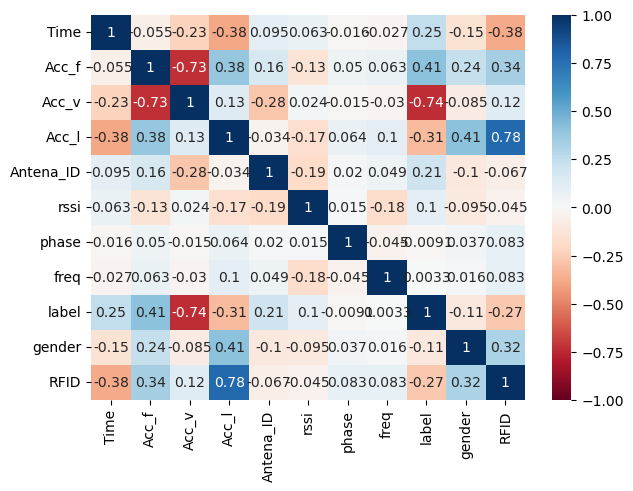

In [90]:
plt.figure(figsize=(7,5))
sns.heatmap(final_df.corr(),annot=True,vmin=-1,cmap='RdBu')
plt.show()

In [100]:
# In order to have better insights lets first explore ACC data with Activity that is being performed
# Lets take a data of a single participant for exploration

p1 = r'D:\Day 5 Case Study\data\S1_Dataset\Male\d1p05M'
data_p1 = pd.read_csv(p1,header=None)
data_p1.columns = ['Time','Acc_f','Acc_v','Acc_l','Antena_ID','rssi','phase','freq','label']

In [104]:
data_p1['label'].value_counts()

label
3    318
1    130
2     36
4     14
Name: count, dtype: int64

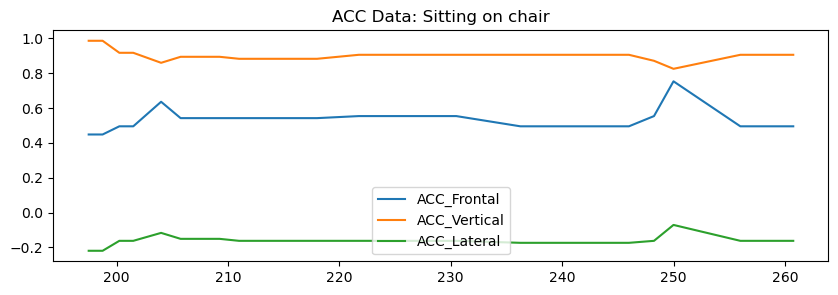

In [137]:
# Lets explore 2:Sitting on chair activity with ACC
sitting_data = data_p1[data_p1['label']==2]

plt.figure(figsize=(10,3))
plt.plot(sitting_data['Time'],sitting_data['Acc_f'],label='ACC_Frontal')
plt.plot(sitting_data['Time'],sitting_data['Acc_v'],label='ACC_Vertical')
plt.plot(sitting_data['Time'],sitting_data['Acc_l'],label='ACC_Lateral')
plt.title('ACC Data: Sitting on chair')
plt.legend()
plt.show()

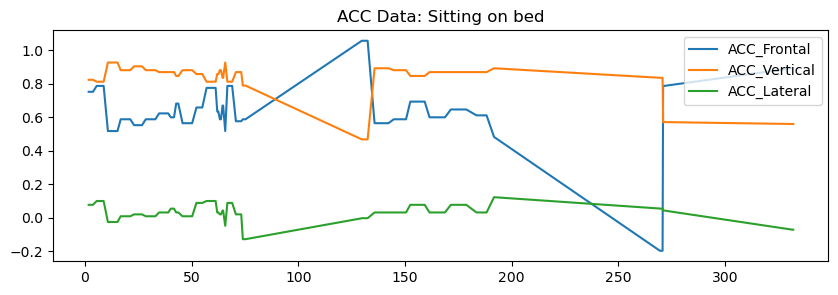

In [139]:
# Lets explore 2:Sitting on bed activity with ACC
sitting_data = data_p1[data_p1['label']==1]

plt.figure(figsize=(10,3))
plt.plot(sitting_data['Time'],sitting_data['Acc_f'],label='ACC_Frontal')
plt.plot(sitting_data['Time'],sitting_data['Acc_v'],label='ACC_Vertical')
plt.plot(sitting_data['Time'],sitting_data['Acc_l'],label='ACC_Lateral')
plt.title('ACC Data: Sitting on bed')
plt.legend()
plt.show()

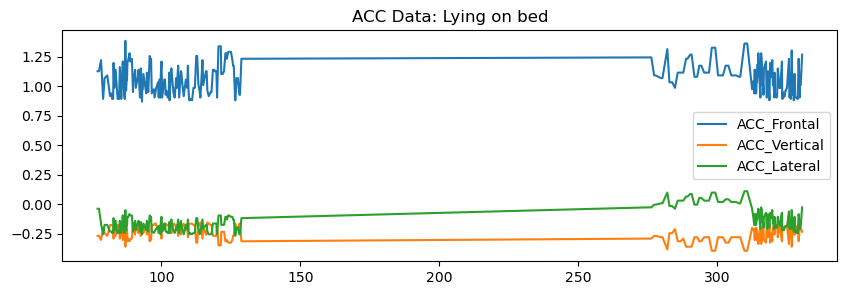

In [141]:
# Lets explore 2:Sitting on chair activity with ACC
sitting_data = data_p1[data_p1['label']==3]

plt.figure(figsize=(10,3))
plt.plot(sitting_data['Time'],sitting_data['Acc_f'],label='ACC_Frontal')
plt.plot(sitting_data['Time'],sitting_data['Acc_v'],label='ACC_Vertical')
plt.plot(sitting_data['Time'],sitting_data['Acc_l'],label='ACC_Lateral')
plt.title('ACC Data: Lying on bed')
plt.legend()
plt.show()

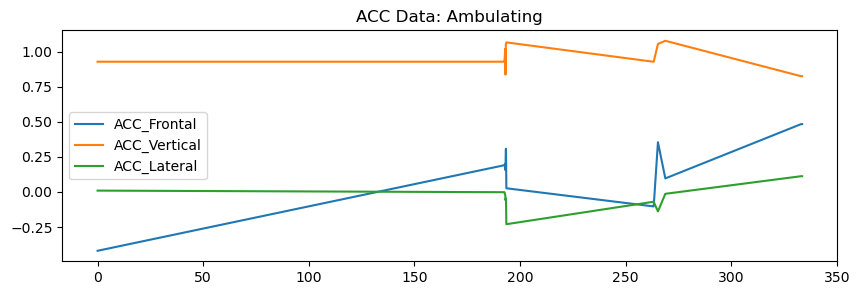

In [143]:
# Lets explore 2:Sitting on chair activity with ACC
sitting_data = data_p1[data_p1['label']==4]

plt.figure(figsize=(10,3))
plt.plot(sitting_data['Time'],sitting_data['Acc_f'],label='ACC_Frontal')
plt.plot(sitting_data['Time'],sitting_data['Acc_v'],label='ACC_Vertical')
plt.plot(sitting_data['Time'],sitting_data['Acc_l'],label='ACC_Lateral')
plt.title('ACC Data: Ambulating')
plt.legend()
plt.show()

Inference:

The Accelaration Data is different for different activities. This shows that It could be an informataive attribute to predict what kind of activity is going on.

In [152]:
# Does ACC data for Female will be different from Male?

Try at home

In [155]:
# Lets look at distribution of male and Female in Final data

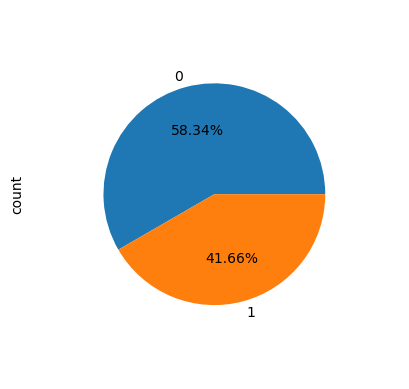

In [163]:
final_df['gender'].value_counts().plot(kind='pie',autopct='%.2f%%',radius=0.75)
plt.show()

In [165]:
# Lets explore the Sensor ID's in two different setups of experiment

In [171]:
final_df[final_df['RFID']==4]['Antena_ID'].value_counts()

Antena_ID
1    21510
4    14200
3    12043
2     4729
Name: count, dtype: int64

In [173]:
final_df[final_df['RFID']==3]['Antena_ID'].value_counts()

Antena_ID
3    12675
2     9134
1      837
Name: count, dtype: int64

In [175]:
# Explore Antena_ID with Activites

In [179]:
# 3 anetana settings
data_3 = final_df[final_df['RFID']==3]
pd.crosstab(data_3['Antena_ID'],data_3['label'])

label,1,2,3,4
Antena_ID,,,,
1,101,529,3,204
2,547,1,8542,44
3,596,0,11992,87


In [181]:
# 4 anetana settings
data_4 = final_df[final_df['RFID']==4]
pd.crosstab(data_4['Antena_ID'],data_4['label'])

label,1,2,3,4
Antena_ID,,,,
1,9660,552,10569,729
2,17,3828,11,873
3,1648,1,10316,78
4,3837,0,10087,276


## Predictive Modelling

In [184]:
# Lets try to predict the activity if we have a data from the sensor

In [186]:
# Lets Start with Decision Tree as a base Model

In [235]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [192]:
# Before we proceed the target must encoded from 0 to n-1 (n : no of clasess)
final_df['label']= final_df['label']-1

In [194]:
final_df['label'].value_counts()

label
2    51520
0    16406
1     4911
3     2291
Name: count, dtype: int64

In [196]:
# We can also remove the time variable
final_df.drop(columns='Time',inplace=True)

In [198]:
final_df

,Acc_f,Acc_v,Acc_l,Antena_ID,rssi,phase,freq,label,gender,RFID
0,0.51826,0.89339,0.134560,4,-56.5,5.83680,921.75,0,0,4
1,0.51826,0.89339,0.134560,3,-68.0,4.84120,925.75,0,0,4
2,0.51826,0.89339,0.134560,4,-55.5,3.64170,924.25,0,0,4
3,0.51826,0.89339,0.134560,3,-57.5,1.77790,924.75,0,0,4
4,0.51826,0.89339,0.134560,4,-61.5,0.24083,922.75,0,0,4
...,...,...,...,...,...,...,...,...,...,...
75123,0.57689,0.88191,0.134560,3,-62.5,3.76290,922.75,0,1,3
75124,0.57689,0.88191,0.134560,2,-63.5,5.60210,924.75,0,1,3
75125,0.35411,0.96229,0.088944,1,-65.0,0.98175,923.75,0,1,3
75126,0.35411,0.96229,0.088944,3,-60.0,1.46030,922.25,0,1,3


In [200]:
# Train Test Split
y = final_df['label']
x = final_df.drop(columns='label')

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,train_size=0.8,random_state=2)

In [212]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60102, 9) (60102,)
(15026, 9) (15026,)


### Decision Tree (Base Model)

In [217]:
model_dt = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [219]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [221]:
pred = model_dt.predict(x_test)

In [223]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3282
           1       0.86      0.93      0.89       982
           2       1.00      1.00      1.00     10304
           3       0.91      0.50      0.64       458

    accuracy                           0.97     15026
   macro avg       0.92      0.85      0.87     15026
weighted avg       0.97      0.97      0.97     15026



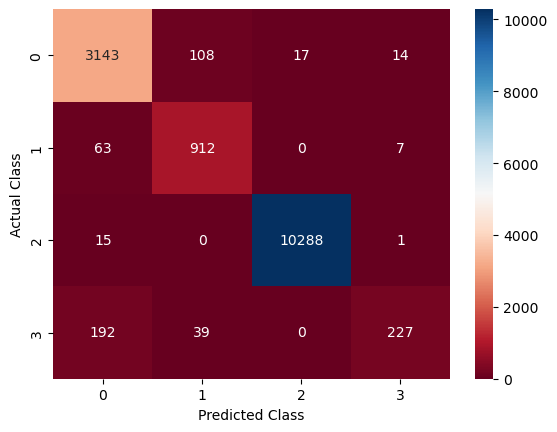

In [231]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='RdBu',fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [245]:
# Fine Tune The Decision Tree
grid = {'max_depth':[9,10,11,12,13]}

gscv = GridSearchCV(estimator=DecisionTreeClassifier(),cv=5,scoring='accuracy',
                   verbose=1,param_grid=grid)

gscv.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [9, 10, 11, 12, 13]}, scoring='accuracy',
             verbose=1)

In [247]:
gscv.best_score_

0.9848923396812095

In [249]:
gscv.best_params_

{'max_depth': 12}

In [265]:
model_dt = DecisionTreeClassifier(**gscv.best_params_)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12)

In [267]:
pred = model_dt.predict(x_test)

In [269]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3282
           1       0.97      0.99      0.98       982
           2       1.00      1.00      1.00     10304
           3       0.88      0.69      0.77       458

    accuracy                           0.99     15026
   macro avg       0.95      0.91      0.93     15026
weighted avg       0.98      0.99      0.98     15026



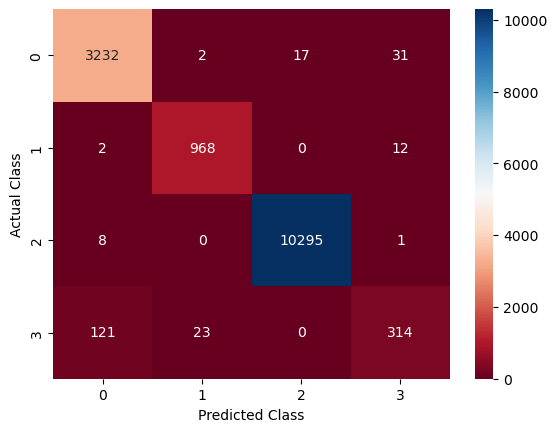

In [271]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='RdBu',fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [279]:
pd.DataFrame({'FI':model_dt.feature_importances_},index=x.columns)\
.sort_values(by='FI',ascending=False)

,FI
Acc_v,0.704983
Antena_ID,0.118288
rssi,0.062144
Acc_f,0.046541
RFID,0.029927
Acc_l,0.029062
freq,0.003428
phase,0.003097
gender,0.002529


## Random Forest

In [290]:
grid = {'n_estimators':[60,70,90,100],
       'max_depth':[5,6,7]}

In [292]:
gscv = GridSearchCV(estimator=RandomForestClassifier(),cv=5,scoring='accuracy',
                   verbose=1,param_grid=grid)

gscv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7],
                         'n_estimators': [60, 70, 90, 100]},
             scoring='accuracy', verbose=1)

In [294]:
gscv.best_score_

0.9778376540444128

In [296]:
gscv.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [298]:
model_rf = RandomForestClassifier(**gscv.best_params_)
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7)

In [300]:
pred = model_rf.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      3282
           1       0.96      0.94      0.95       982
           2       1.00      1.00      1.00     10304
           3       0.97      0.48      0.64       458

    accuracy                           0.98     15026
   macro avg       0.96      0.85      0.89     15026
weighted avg       0.98      0.98      0.98     15026



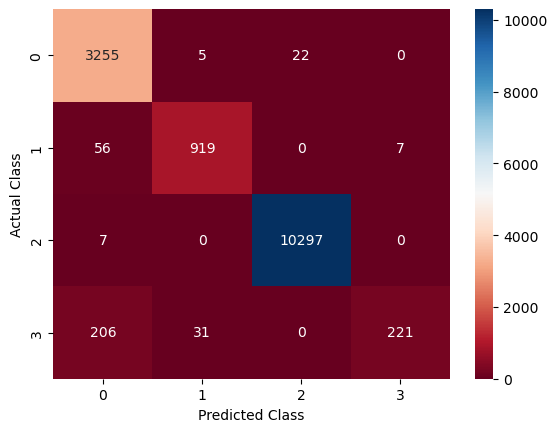

In [302]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='RdBu',fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [304]:
pd.DataFrame({'FI':model_rf.feature_importances_},index=x.columns)\
.sort_values(by='FI',ascending=False)

,FI
Acc_v,0.487360
Acc_f,0.171960
Antena_ID,0.114017
Acc_l,0.109837
rssi,0.055394
RFID,0.048040
gender,0.011081
freq,0.001189
phase,0.001121


## XGBOOST

In [313]:
grid = {'n_estimators':[70,90,100,120],
       'max_depth':[5,7,8,10,12]}

gscv = GridSearchCV(estimator=XGBClassifier(),cv=5,scoring='accuracy',
                   verbose=1,param_grid=grid)

gscv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [5, 7, 8, 10, 12],
                         'n_estimators': [70, 90, 100, 120]},
             scoring='accuracy', verbose=1)

In [315]:
gscv.best_score_

0.9912981262269674

In [317]:
gscv.best_params_

{'max_depth': 12, 'n_estimators': 120}

In [323]:
model_xgb = XGBClassifier(**gscv.best_params_)
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [327]:
pred = model_xgb.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3282
           1       0.98      0.99      0.99       982
           2       1.00      1.00      1.00     10304
           3       0.94      0.85      0.89       458

    accuracy                           0.99     15026
   macro avg       0.98      0.96      0.97     15026
weighted avg       0.99      0.99      0.99     15026



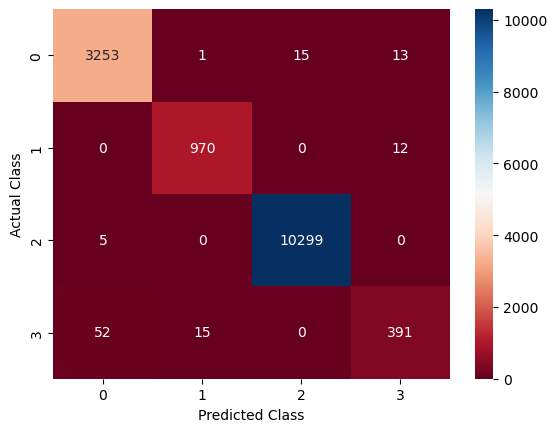

In [329]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='RdBu',fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [345]:
pd.DataFrame({'FI':model_xgb.feature_importances_},index=x.columns)\
.sort_values(by='FI',ascending=False)

,FI
Acc_v,0.473062
Antena_ID,0.271649
RFID,0.122675
rssi,0.054750
Acc_f,0.029218
Acc_l,0.018812
gender,0.017934
freq,0.006645
phase,0.005255


## Validation Of Final Model

In [347]:
# Gender, Freq and Phase dosent seems to be good enough features to predict the activity
# We ca remove these features before fitting the final model (Feature Selection)

In [349]:
x_train.drop(columns=['freq','phase','gender'], inplace=True)
x_test.drop(columns=['freq','phase','gender'], inplace=True)

In [351]:
final_model = XGBClassifier(**gscv.best_params_)
final_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [335]:
# The score are eighter 0.99 or infact 1. That is clear indication of overfitting
# We need to check wether we get the same score at different training datasets
# In that way we will be able to identify how generalised the model is?

In [353]:
from sklearn.model_selection import KFold, cross_val_score

In [355]:
cross_val_score(estimator=final_model,X=x_train,y=y_train,scoring='accuracy',cv=KFold(n_splits=7,shuffle=True))

array([0.99184719, 0.99114838, 0.99254601, 0.99184719, 0.9903331 ,
       0.99254601, 0.99010016])

In [359]:
pd.DataFrame({'FI':final_model.feature_importances_},index=x_train.columns)\
.sort_values(by='FI',ascending=False)

,FI
Acc_v,0.415279
Antena_ID,0.321486
RFID,0.165780
rssi,0.051428
Acc_f,0.026946
Acc_l,0.019082


In [361]:
pred = final_model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3282
           1       0.98      0.99      0.98       982
           2       1.00      1.00      1.00     10304
           3       0.93      0.86      0.90       458

    accuracy                           0.99     15026
   macro avg       0.97      0.96      0.97     15026
weighted avg       0.99      0.99      0.99     15026



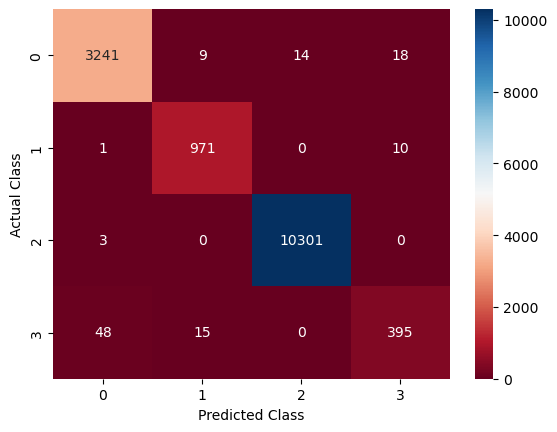

In [363]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='RdBu',fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## Deployment

In [366]:
import joblib

In [368]:
with open('final_model.joblib','wb') as file:
    joblib.dump(final_model,file)

In [370]:
final_model.feature_names_in_

array(['Acc_f', 'Acc_v', 'Acc_l', 'Antena_ID', 'rssi', 'RFID'],
      dtype='<U9')